# **Task 2 - User Engagement analysis**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Read the cleaned dataframe**

In [ ]:
df2=pd.read_csv('/content/cleaned_telco_data.csv')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 150001 non-null  float64
 1   Start                                     150001 non-null  object 
 2   Start ms                                  150001 non-null  float64
 3   End                                       150001 non-null  object 
 4   End ms                                    150001 non-null  float64
 5   Dur. (ms)                                 142817 non-null  float64
 6   IMSI                                      146523 non-null  float64
 7   MSISDN/Number                             125259 non-null  float64
 8   IMEI                                      150001 non-null  float64
 9   Last Location Name                        150001 non-null  object 
 10  Avg RTT DL (ms)     

In [ ]:
df2.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [ ]:
from unicodedata import category

# Convert specified columns to 'category' data type
to_string = ['IMEI', 'IMSI', 'MSISDN/Number']
for col in to_string:
    df2[col] = df2[col].astype('category')

In [ ]:
class CleanData:
    def __init__(self, df2):
        self.df2 = df2

    def fill_mode(self, df2):
        # Replace missing values with mode
        return df2.fillna(df2.mode().iloc[0])

    def handle_outliers(self, df2, lower_percentile, upper_percentile):
        # Convert to numeric if necessary
        df2 = df2.apply(pd.to_numeric, errors='coerce') # Indent this line by 4 spaces
        return df2[(df2 >= df2.quantile(lower_percentile)) & (df2 <= df2.quantile(upper_percentile))]

In [ ]:
# Initialize the CleanData class with the DataFrame
cleaner = CleanData(df2)

# Replace missing values with mode
selected_df2 = cleaner.fill_mode(df2)

# Drop rows with null values
selected_df2 = selected_df2.dropna(axis=0)

# Display DataFrame info
selected_df2.info()

# Describe the DataFrame excluding object and category types
print(df2.describe(include=[np.number]))

# Handle outliers with the CleanData class
df2 = cleaner.handle_outliers(df2, 0.25, 0.75)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype   
---  ------                                    --------------   -----   
 0   Bearer Id                                 150001 non-null  float64 
 1   Start                                     150001 non-null  object  
 2   Start ms                                  150001 non-null  float64 
 3   End                                       150001 non-null  object  
 4   End ms                                    150001 non-null  float64 
 5   Dur. (ms)                                 150001 non-null  float64 
 6   IMSI                                      150001 non-null  category
 7   MSISDN/Number                             150001 non-null  category
 8   IMEI                                      150001 non-null  category
 9   Last Location Name                        150001 non-null  object  
 10  Avg RTT 

# **Task 2.1**
# **A. Aggregate session frequeuncy, duration, traffic**
**Duration of the session**

In [ ]:
total_duration = df2.groupby('MSISDN/Number').agg(
    {'Dur. (ms)': 'sum'}).reset_index().rename(columns={'Dur. (ms)': 'total_duration'})

total_duration

,MSISDN/Number,total_duration
0,3.365016e+10,192616.0
1,3.365016e+10,121426.0
2,3.365016e+10,97932.0
3,3.365016e+10,0.0
4,3.365017e+10,86107.0
...,...,...
43800,3.366790e+10,172798.0
43801,3.366790e+10,86399.0
43802,3.366790e+10,83284.0
43803,3.366790e+10,0.0


<Axes: >

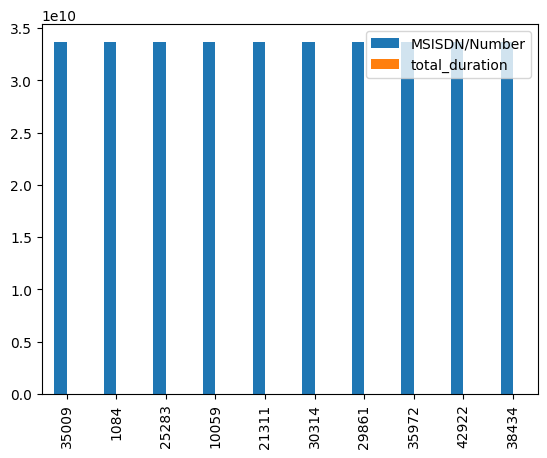

In [ ]:
sorted_df = total_duration.sort_values('total_duration',ascending=False)[:10]
sorted_df.plot.bar()


**2. Session total traffic**

In [ ]:
class DataFrameInformation:
    def __init__(self, df):
        self.df = df

    def get_column_with_string(self, df, pattern):
        # Find columns whose names contain the pattern
        return [col for col in df.columns if pattern in col]

In [ ]:
# Initialize DataFrameInformation with df2
datainfo = DataFrameInformation(df2)

# Get columns related to download bytes
# The pattern was incorrect, it should be 'DL (Bytes)' instead of 'DL \(Bytes\)'
dl_columns = datainfo.get_column_with_string(df2, 'DL (Bytes)')

# Calculate total download for each 'MSISDN/Number'
total_download = df2.groupby(
    'MSISDN/Number'
).agg({c: 'sum' for c in dl_columns}).sum(axis=1)

# Convert the result to a DataFrame
total_download = pd.DataFrame(total_download, columns=['total_download']).reset_index()

total_download

,MSISDN/Number,total_download
0,3.365016e+10,2.367878e+09
1,3.365016e+10,1.387698e+09
2,3.365016e+10,4.983997e+08
3,3.365016e+10,5.029432e+08
4,3.365017e+10,1.403482e+08
...,...,...
43800,3.366790e+10,1.611215e+09
43801,3.366790e+10,4.267045e+08
43802,3.366790e+10,1.437300e+09
43803,3.366790e+10,1.186713e+09


<Axes: >

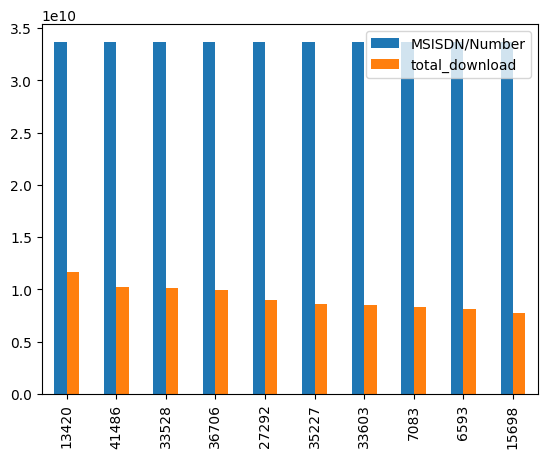

In [ ]:
sorted_df = total_download.sort_values('total_download', ascending=False)[:10]
sorted_df.plot.bar()

In [ ]:

# Get columns related to upload bytes
# The pattern was incorrect, it should be 'UL (Bytes)' instead of 'UL \(Bytes\)'
ul_columns = datainfo.get_column_with_string(df2, 'UL (Bytes)') # Use df2 instead of df

# Calculate total upload for each 'MSISDN/Number'
# Check if ul_columns is not empty before proceeding
if ul_columns:
    total_upload = df2.groupby('MSISDN/Number').agg({c: 'sum' for c in ul_columns}).sum(axis=1)

    # Convert the result to a DataFrame
    total_upload = pd.DataFrame(total_upload, columns=['total_upload']).reset_index()

    total_upload
else:
    print("No columns found matching the pattern 'UL (Bytes)'")

In [ ]:
total_upload

,MSISDN/Number,total_upload
0,3.365016e+10,4.813541e+07
1,3.365016e+10,3.758524e+07
2,3.365016e+10,5.122923e+07
3,3.365016e+10,3.323127e+07
4,3.365017e+10,5.746825e+07
...,...,...
43800,3.366790e+10,1.422717e+08
43801,3.366790e+10,1.063153e+07
43802,3.366790e+10,1.007653e+07
43803,3.366790e+10,1.254292e+07


<Axes: >

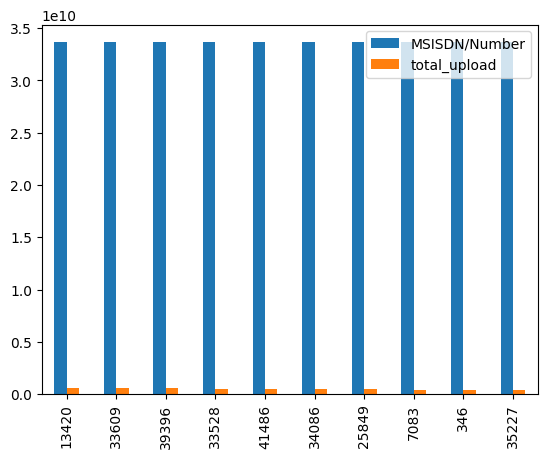

In [ ]:
sorted_df = total_upload.sort_values('total_upload', ascending=False)[:10]
sorted_df.plot.bar()

In [ ]:
total_traffic = total_download.merge(total_upload, on='MSISDN/Number')


total_data = pd.DataFrame(total_traffic['MSISDN/Number'])
total_data['total_data'] = total_traffic['total_download'] + total_traffic['total_upload']
total_data

,MSISDN/Number,total_data
0,3.365016e+10,2.416014e+09
1,3.365016e+10,1.425283e+09
2,3.365016e+10,5.496290e+08
3,3.365016e+10,5.361745e+08
4,3.365017e+10,1.978165e+08
...,...,...
43800,3.366790e+10,1.753487e+09
43801,3.366790e+10,4.373360e+08
43802,3.366790e+10,1.447377e+09
43803,3.366790e+10,1.199256e+09


<Axes: >

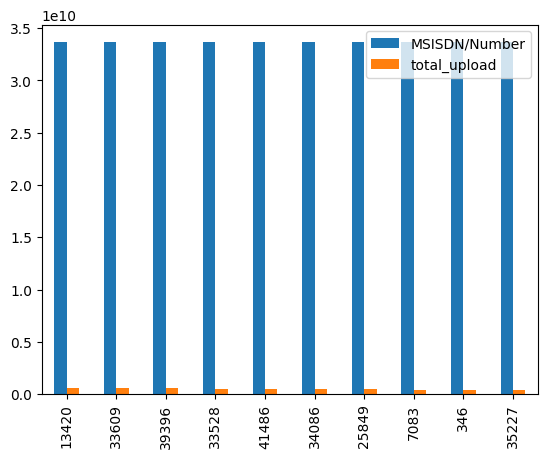

In [ ]:
orted_df = total_data.sort_values('total_data', ascending=False)[:10]
sorted_df.plot.bar()

**3. Sessions Frequency**

In [ ]:
total_freq = df2.groupby('MSISDN/Number').agg(
    {'Bearer Id': 'count'}).reset_index().rename(columns={'Bearer Id': 'total_freq'})

total_freq

,MSISDN/Number,total_freq
0,3.365016e+10,3
1,3.365016e+10,1
2,3.365016e+10,0
3,3.365016e+10,0
4,3.365017e+10,0
...,...,...
43800,3.366790e+10,0
43801,3.366790e+10,0
43802,3.366790e+10,0
43803,3.366790e+10,0


<Axes: >

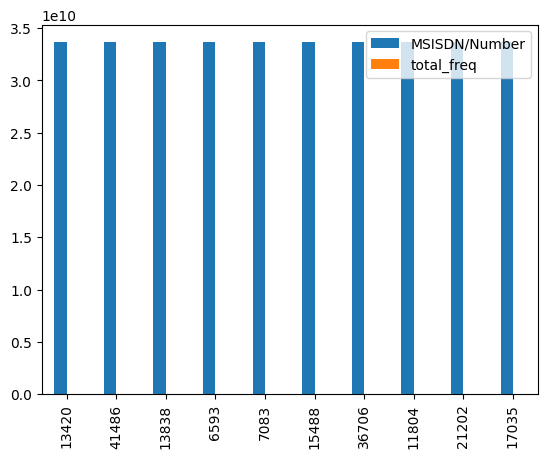

In [ ]:
sorted_df = total_freq.sort_values('total_freq', ascending=False)[:10]
sorted_df.plot.bar()

### **Put the all the aggregation together**



In [ ]:
new_df = total_data.merge(total_duration,how='inner' , on='MSISDN/Number')
new_df = new_df.merge(total_freq, how='inner' , on='MSISDN/Number')
new_new_df = new_df.select_dtypes(exclude='category')
new_new_df

,MSISDN/Number,total_data,total_duration,total_freq
0,3.365016e+10,2.416014e+09,192616.0,3
1,3.365016e+10,1.425283e+09,121426.0,1
2,3.365016e+10,5.496290e+08,97932.0,0
3,3.365016e+10,5.361745e+08,0.0,0
4,3.365017e+10,1.978165e+08,86107.0,0
...,...,...,...,...
43800,3.366790e+10,1.753487e+09,172798.0,0
43801,3.366790e+10,4.373360e+08,86399.0,0
43802,3.366790e+10,1.447377e+09,83284.0,0
43803,3.366790e+10,1.199256e+09,0.0,0


# **B. Normalization and k-means clustering with k=3**


**1. mean normalization**

In [ ]:
normalized_df = (new_new_df - new_new_df.mean())/new_new_df.std()
normalized_df

,MSISDN/Number,total_data,total_duration,total_freq
0,-2.390484,1.461906,1.583347,2.419083
1,-2.390481,0.359296,0.698092,0.251473
2,-2.390441,-0.615242,0.405942,-0.832331
3,-2.390413,-0.630216,-0.811853,-0.832331
4,-2.390267,-1.006784,0.258897,-0.832331
...,...,...,...,...
43800,1.470926,0.724563,1.336908,-0.832331
43801,1.470943,-0.740216,0.262528,-0.832331
43802,1.471029,0.383885,0.223792,-0.832331
43803,1.471254,0.107745,-0.811853,-0.832331


**2. k-means clustering**

In [ ]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=3)
Kmean.fit(normalized_df)

centroids = Kmean.cluster_centers_
centroids

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([[ 0.30524968, -0.19083856, -0.19519203, -0.20850918],
       [ 0.10719543,  1.95987167,  2.05807355,  2.15131231],
       [-2.20202747, -0.13151331, -0.17431703, -0.15110724]])

In [ ]:
# Initialize the DataFrame to store distances
new_df = normalized_df.copy()

# Calculate the Euclidean distance to each centroid and store in separate columns
for i in range(centroids.shape[0]):
    new_df[f'distance_to_centroid_{i}'] = normalized_df.apply(
        lambda x: np.sqrt(np.sum(np.square(x - centroids[i, :]))), axis=1
    )

# Calculate the engagement score as the minimum distance to any centroid
new_df['engagement_score'] = new_df[[f'distance_to_centroid_{i}' for i in range(centroids.shape[0])]].min(axis=1)

# Save the DataFrame to a CSV file in the current directory
new_df.to_csv('user_engagement_score.csv', index=False)

new_df.head()

,MSISDN/Number,total_data,total_duration,total_freq,distance_to_centroid_0,distance_to_centroid_1,distance_to_centroid_2,engagement_score
0,-2.390484,1.461906,1.583347,2.419083,4.479507,2.604504,3.502821,2.604504
1,-2.390481,0.359296,0.698092,0.251473,2.929019,3.776132,1.095252,1.095252
2,-2.390441,-0.615242,0.405942,-0.832331,2.863108,4.949856,1.034534,1.034534
3,-2.390413,-0.630216,-0.811853,-0.832331,2.868636,5.484998,1.074575,1.074575
4,-2.390267,-1.006784,0.258897,-0.832331,2.920090,5.213207,1.205517,1.205517


In [ ]:
centroids_df = pd.DataFrame(centroids)
centroids_df

,0,1,2,3
0,0.305250,-0.190839,-0.195192,-0.208509
1,0.107195,1.959872,2.058074,2.151312
2,-2.202027,-0.131513,-0.174317,-0.151107


In [ ]:
centroids_df[0]

,0
0,0.305250
1,0.107195
2,-2.202027


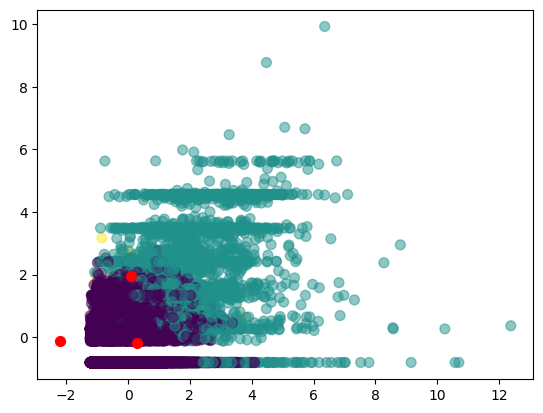

In [ ]:
plt.scatter(normalized_df['total_data'], normalized_df['total_duration'],
            c=Kmean.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids_df[0], centroids_df[1], c='red', s=50)
plt.show()

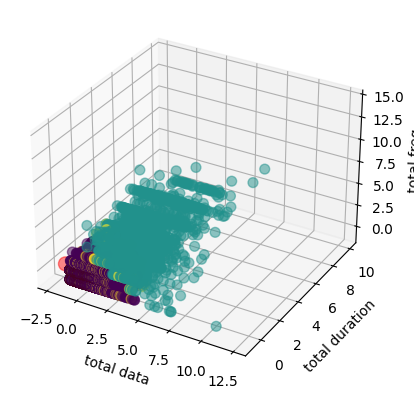

In [ ]:
# Create the figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Generate the values
x_vals = normalized_df['total_data']
y_vals = normalized_df['total_duration']
z_vals = normalized_df['total_freq']

# # Plot the values

ax.scatter(centroids_df[0], centroids_df[1], centroids_df[2], c='red', s=100)
ax.scatter(x_vals, y_vals, z_vals,
           c=Kmean.labels_.astype(float), s=50, alpha=0.5)

ax.set_xlabel('total data')
ax.set_ylabel('total duration')
ax.set_zlabel('total freq')

plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter_3d(centroids_df, x= 0,y=1, z=2, color=[3, 3, 3])
fig = px.scatter_3d(normalized_df, x='total_data', y='total_duration', z='total_freq',
                    color=Kmean.labels_.astype(float))

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

### **C. Minimum, maximum, average, total**

In [ ]:
new_df.describe()

,MSISDN/Number,total_data,total_duration,total_freq,distance_to_centroid_0,distance_to_centroid_1,distance_to_centroid_2,engagement_score
count,4.380500e+04,4.380500e+04,4.380500e+04,4.380500e+04,43805.000000,43805.000000,43805.000000,43805.000000
mean,1.070403e-13,1.085157e-16,-2.141117e-17,3.406323e-17,1.702007,3.997076,2.771886,1.349825
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.146423,0.860061,1.111768,0.596127
min,-2.390484e+00,-1.226907e+00,-8.118527e-01,-8.323313e-01,0.477700,0.450235,0.408869,0.408869
25%,-4.287273e-01,-7.021008e-01,-8.118527e-01,-8.323313e-01,1.056305,3.608010,2.141449,1.001830
50%,1.359480e-01,-1.489411e-01,3.301290e-02,2.514734e-01,1.283349,4.125192,2.708280,1.210297
75%,7.294464e-01,4.277817e-01,3.371133e-01,2.514734e-01,1.971806,4.586495,3.298318,1.458274
max,1.471257e+00,1.237663e+01,9.932895e+00,1.434093e+01,19.243572,16.129044,19.244316,16.129044


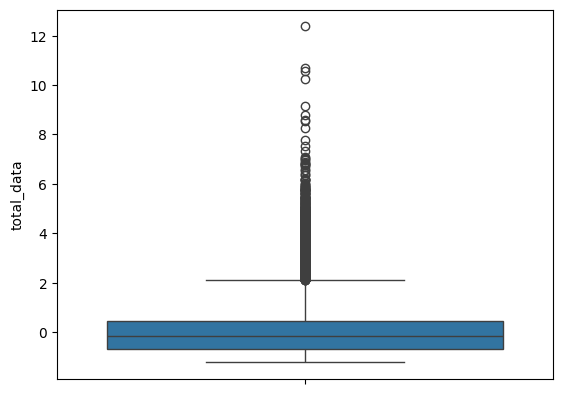

In [ ]:
ax = sns.boxplot(data=new_df['total_data'])

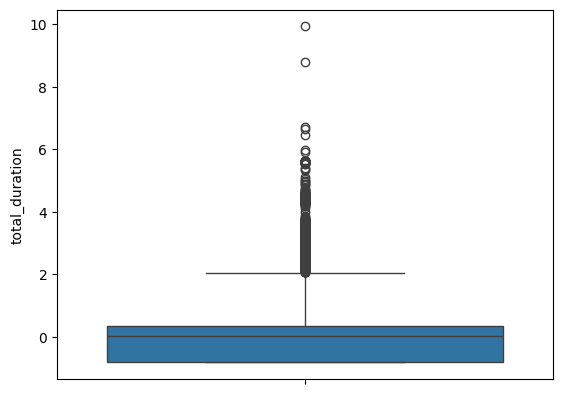

In [ ]:
ax = sns.boxplot(data=new_df['total_duration'])

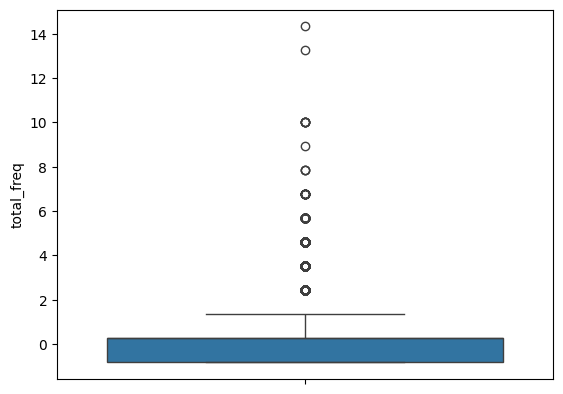

In [ ]:
ax = sns.boxplot(data=new_df['total_freq'])

**D. Aggregate user total traffic per application**

**1. aggregate**

In [ ]:
# Get columns with 'Bytes' in their names
selected_columns = datainfo.get_column_with_string(df2, 'Bytes')

# Create a new DataFrame with 'MSISDN/Number' and the selected columns
app_df = df2[['MSISDN/Number'] + selected_columns]

app_df

,MSISDN/Number,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),HTTP DL (Bytes),HTTP UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,3.366496e+10,2.080991e+07,759658.664811,1.144710e+08,3.242301e+06,1545765.000,24420.00000,NaN,1271433.000,NaN,...,15854611.0,NaN,8198936.00,9656251.00,278082303.0,NaN,NaN,8.814393e+06,3.674974e+07,3.088796e+08
1,NaN,2.080991e+07,759658.664811,1.144710e+08,3.242301e+06,1926113.000,NaN,3493924.000,NaN,NaN,...,NaN,NaN,NaN,NaN,608750074.0,NaN,526904238.0,NaN,NaN,6.533850e+08
2,NaN,2.080991e+07,759658.664811,1.144710e+08,3.242301e+06,1684053.000,42224.00000,8535055.000,1694064.000,NaN,...,NaN,14699576.00,NaN,6163408.00,229584621.0,NaN,410692588.0,4.215763e+06,NaN,2.798073e+08
3,NaN,2.080991e+07,759658.664811,1.144710e+08,3.242301e+06,NaN,NaN,NaN,2788027.000,1439754.000,...,NaN,15146643.00,13994646.00,NaN,NaN,1.084972e+07,NaN,NaN,4.332422e+07,NaN
4,NaN,2.080991e+07,759658.664811,1.144710e+08,3.242301e+06,NaN,NaN,6248284.000,1500559.000,1936496.000,...,15259380.0,NaN,17124581.00,NaN,527707248.0,NaN,550709500.0,NaN,3.854281e+07,5.691386e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,3.365069e+10,2.080991e+07,759658.664811,1.144710e+08,3.242301e+06,NaN,NaN,NaN,2817311.000,NaN,...,16191667.0,11763428.00,NaN,NaN,526609673.0,9.197207e+06,NaN,NaN,NaN,5.741753e+08
149997,3.366345e+10,2.080991e+07,759658.664811,1.144710e+08,3.242301e+06,2344568.000,NaN,NaN,2185941.000,1954414.000,...,13877234.0,8288284.00,NaN,NaN,626893062.0,4.735033e+06,NaN,NaN,3.913508e+07,NaN
149998,NaN,2.080991e+07,759658.664811,1.144710e+08,3.242301e+06,1245845.000,NaN,3850890.000,2734579.000,1525734.000,...,NaN,NaN,9963942.00,NaN,553539484.0,NaN,NaN,1.131473e+07,3.491222e+07,5.927864e+08
149999,NaN,2.080991e+07,759658.664811,1.144710e+08,3.242301e+06,NaN,21562.00000,4189773.000,NaN,2228270.000,...,8817106.0,8305402.00,NaN,13172589.00,352536971.0,NaN,NaN,NaN,NaN,3.718959e+08


In [ ]:
paired_columns = []

for i in range(len(selected_columns)//2):
    paired_columns.append( [selected_columns[2*i],selected_columns[2*i+1]])
paired_columns

[['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)'],
 ['HTTP DL (Bytes)', 'HTTP UL (Bytes)'],
 ['Social Media DL (Bytes)', 'Social Media UL (Bytes)'],
 ['Google DL (Bytes)', 'Google UL (Bytes)'],
 ['Email DL (Bytes)', 'Email UL (Bytes)'],
 ['Youtube DL (Bytes)', 'Youtube UL (Bytes)'],
 ['Netflix DL (Bytes)', 'Netflix UL (Bytes)'],
 ['Gaming DL (Bytes)', 'Gaming UL (Bytes)'],
 ['Other DL (Bytes)', 'Other UL (Bytes)'],
 ['Total UL (Bytes)', 'Total DL (Bytes)']]

In [ ]:
agg_app_df = app_df.groupby('MSISDN/Number').agg({c:'sum' for c in selected_columns})
agg_app_df = agg_app_df.reset_index()
agg_app_df

,MSISDN/Number,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),HTTP DL (Bytes),HTTP UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,3.365016e+10,7.841526e+06,9.507800e+04,8.833394e+07,5.935186e+06,3315981.0,35154.0,13929495.0,3052897.0,5763895.0,...,31175936.0,26791219.0,30214335.0,0.0,807145384.0,11582313.0,495078154.0,0.0,0.0,892921264.0
1,3.365016e+10,2.080991e+07,1.519317e+06,1.144710e+08,3.242301e+06,2335623.0,18828.0,0.0,2599306.0,2438629.0,...,10817946.0,6158357.0,25497528.0,11107904.0,442635936.0,5216040.0,319618380.0,8610183.0,0.0,469882706.0
2,3.365016e+10,2.080991e+07,7.596587e+05,1.144710e+08,3.242301e+06,1681241.0,46067.0,5746449.0,1694026.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9447774.0,376501025.0,0.0,36799063.0,0.0
3,3.365016e+10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1995848.0,42184.0,0.0,0.0,0.0,...,0.0,8429285.0,0.0,16029392.0,0.0,8336941.0,500947390.0,0.0,0.0,0.0
4,3.365017e+10,0.000000e+00,0.000000e+00,1.144710e+08,0.000000e+00,1603070.0,29441.0,3468728.0,0.0,2569601.0,...,12031583.0,10925325.0,6204217.0,0.0,0.0,5828932.0,0.0,0.0,40684551.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43800,3.366790e+10,1.332221e+07,4.082770e+05,0.000000e+00,0.000000e+00,1075622.0,80481.0,7175045.0,4874682.0,2672626.0,...,25375562.0,9372706.0,8666088.0,15674077.0,361077274.0,22928669.0,815341382.0,5967420.0,82818931.0,389831794.0
43801,3.366790e+10,6.635374e+06,0.000000e+00,1.140722e+07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,...,16645598.0,6427212.0,16504006.0,0.0,0.0,0.0,382147691.0,4204318.0,0.0,0.0
43802,3.366790e+10,0.000000e+00,8.309400e+04,4.619356e+06,3.669310e+05,0.0,0.0,7492999.0,0.0,1171285.0,...,16657129.0,9709595.0,0.0,0.0,536701880.0,0.0,299687059.0,0.0,0.0,570970645.0
43803,3.366790e+10,2.717005e+06,5.311540e+05,0.000000e+00,0.000000e+00,1047422.0,0.0,3220313.0,1747166.0,1846348.0,...,16913504.0,0.0,0.0,0.0,291107911.0,10795756.0,540220968.0,0.0,0.0,332356908.0


In [ ]:
total_df = pd.DataFrame()
total_df['MSISDN/Number'] = agg_app_df['MSISDN/Number']
for col in paired_columns:
    total_df[col[0].split(' ')[0]] = agg_app_df[col[0]] + agg_app_df[col[1]]
total_df

,MSISDN/Number,TCP,HTTP,Social,Google,Email,Youtube,Netflix,Gaming,Other,Total
0,3.365016e+10,7.936604e+06,9.426912e+07,3351135.0,16982392.0,6502533.0,57967155.0,30214335.0,818727697.0,495078154.0,892921264.0
1,3.365016e+10,2.232923e+07,1.177133e+08,2354451.0,2599306.0,3070947.0,16976303.0,36605432.0,447851976.0,328228563.0,469882706.0
2,3.365016e+10,2.156957e+07,1.177133e+08,1727308.0,7440475.0,0.0,0.0,0.0,9447774.0,376501025.0,36799063.0
3,3.365016e+10,0.000000e+00,0.000000e+00,2038032.0,0.0,393467.0,8429285.0,16029392.0,8336941.0,500947390.0,0.0
4,3.365017e+10,0.000000e+00,1.144710e+08,1632511.0,3468728.0,2569601.0,22956908.0,6204217.0,5828932.0,0.0,40684551.0
...,...,...,...,...,...,...,...,...,...,...,...
43800,3.366790e+10,1.373049e+07,0.000000e+00,1156103.0,12049727.0,3227388.0,34748268.0,24340165.0,384005943.0,821308802.0,472650725.0
43801,3.366790e+10,6.635374e+06,1.140722e+07,0.0,0.0,0.0,23072810.0,16504006.0,0.0,386352009.0,0.0
43802,3.366790e+10,8.309400e+04,4.986287e+06,0.0,7492999.0,1171285.0,26366724.0,0.0,536701880.0,299687059.0,570970645.0
43803,3.366790e+10,3.248159e+06,0.000000e+00,1047422.0,4967479.0,1846348.0,16913504.0,0.0,301903667.0,540220968.0,332356908.0


**2. top 10 most engaged user per applications**

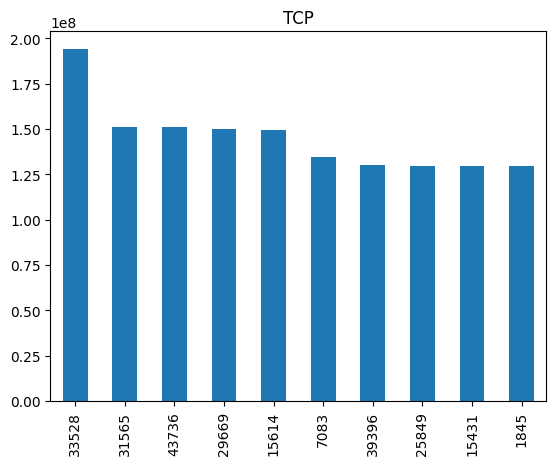

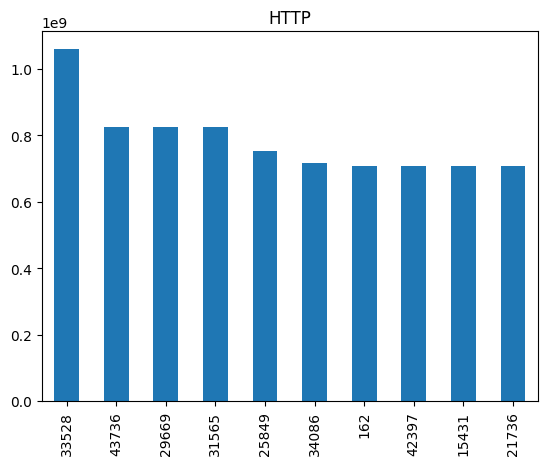

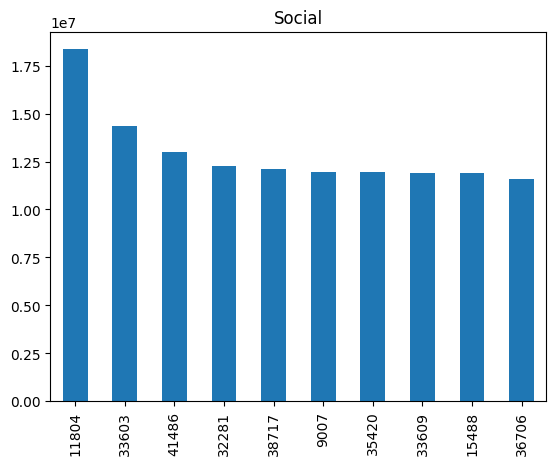

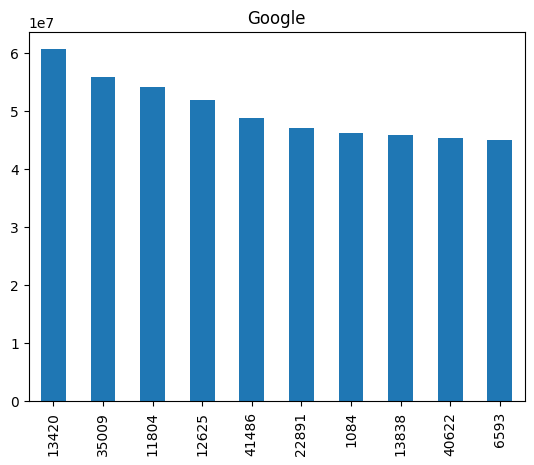

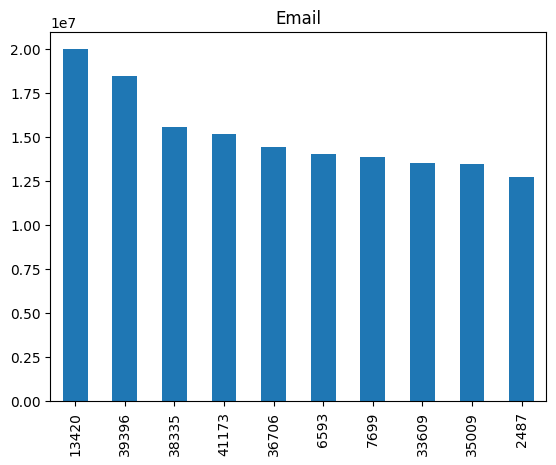

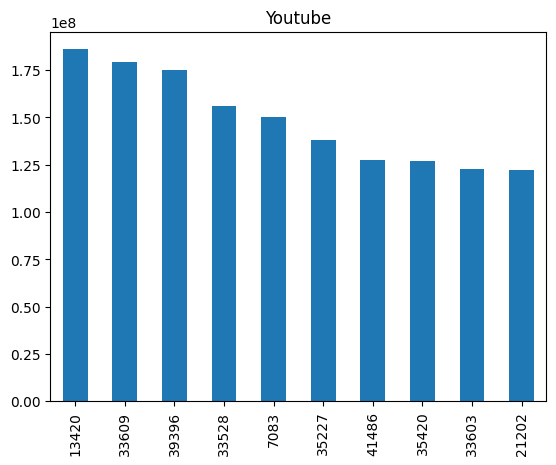

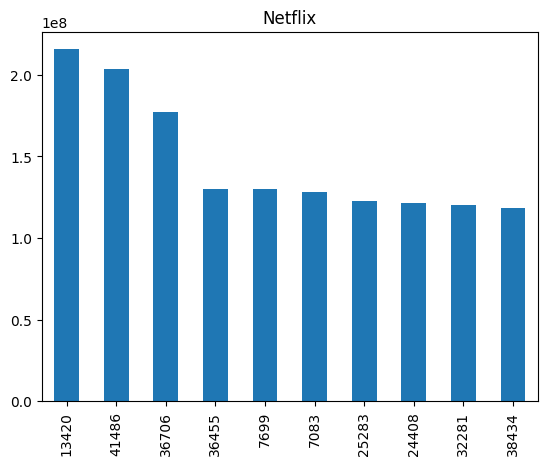

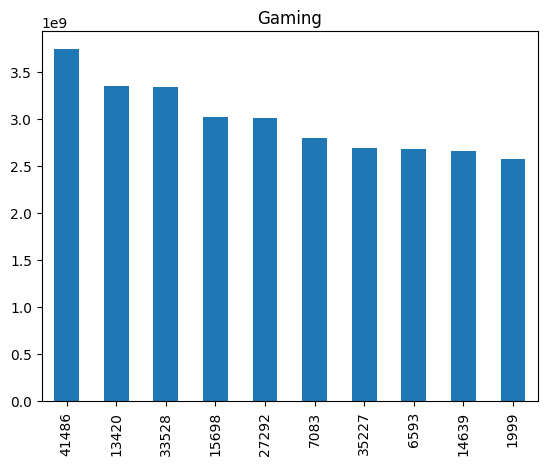

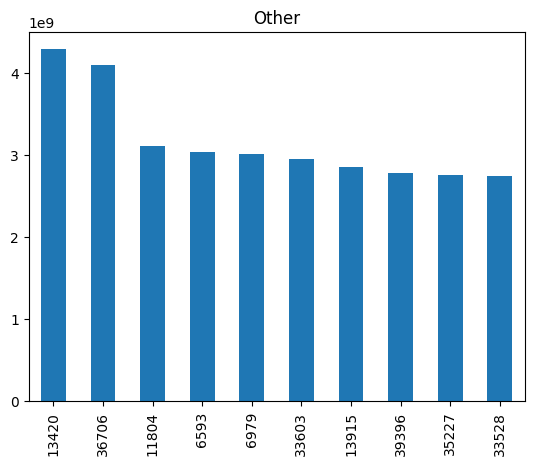

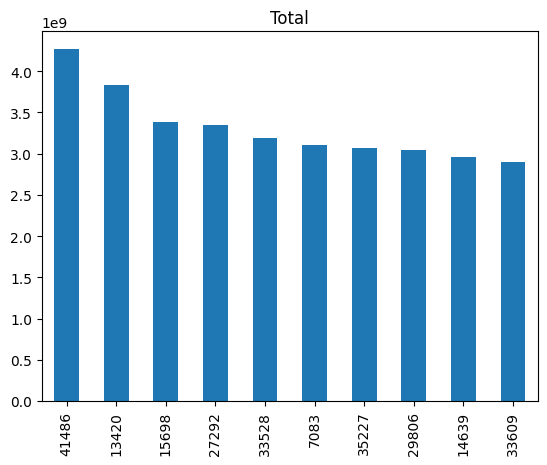

In [ ]:
for col in total_df.columns[1:]:
    total_df.sort_values(col,ascending=False)[col][:10].plot(kind='bar',title=col)
    plt.show()

## **E. Top 3 most used application**

In [ ]:
sum_df = total_df.loc[:, total_df.columns != 'MSISDN/Number']
sum_df = sum_df.loc[:, sum_df.columns != 'Total']
sum_df = pd.DataFrame(sum_df.sum(),columns=['sum']).sort_values('sum',ascending=False)
sum_df

,sum
Gaming,1.352712e+13
Other,1.341604e+13
HTTP,3.966381e+12
TCP,7.938008e+11
Youtube,7.082822e+11
Netflix,7.050524e+11
Google,2.440229e+11
Email,7.053099e+10
Social,5.708468e+10


<Axes: >

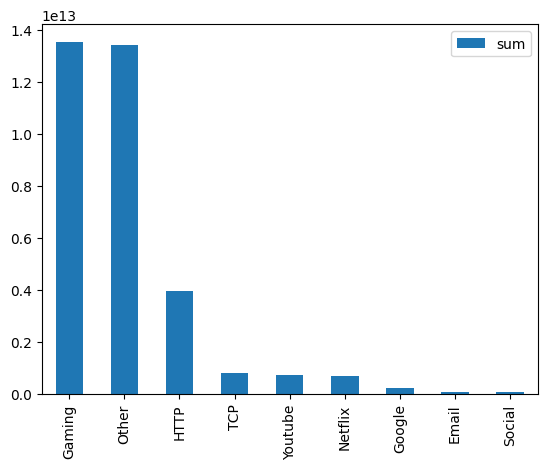

In [ ]:
sum_df.plot.bar()

## **F. K-mean clustering - optimized k values**

In [ ]:
seg_eng_df = total_df.loc[:, total_df.columns != 'Total']
seg_eng_df = seg_eng_df.loc[:, seg_eng_df.columns != 'MSISDN/Number']
seg_eng_df

,TCP,HTTP,Social,Google,Email,Youtube,Netflix,Gaming,Other
0,7.936604e+06,9.426912e+07,3351135.0,16982392.0,6502533.0,57967155.0,30214335.0,818727697.0,495078154.0
1,2.232923e+07,1.177133e+08,2354451.0,2599306.0,3070947.0,16976303.0,36605432.0,447851976.0,328228563.0
2,2.156957e+07,1.177133e+08,1727308.0,7440475.0,0.0,0.0,0.0,9447774.0,376501025.0
3,0.000000e+00,0.000000e+00,2038032.0,0.0,393467.0,8429285.0,16029392.0,8336941.0,500947390.0
4,0.000000e+00,1.144710e+08,1632511.0,3468728.0,2569601.0,22956908.0,6204217.0,5828932.0,0.0
...,...,...,...,...,...,...,...,...,...
43800,1.373049e+07,0.000000e+00,1156103.0,12049727.0,3227388.0,34748268.0,24340165.0,384005943.0,821308802.0
43801,6.635374e+06,1.140722e+07,0.0,0.0,0.0,23072810.0,16504006.0,0.0,386352009.0
43802,8.309400e+04,4.986287e+06,0.0,7492999.0,1171285.0,26366724.0,0.0,536701880.0,299687059.0
43803,3.248159e+06,0.000000e+00,1047422.0,4967479.0,1846348.0,16913504.0,0.0,301903667.0,540220968.0


In [ ]:
normalized_seg_eng_df = (seg_eng_df-seg_eng_df.mean())/seg_eng_df.std()
normalized_seg_eng_df

,TCP,HTTP,Social,Google,Email,Youtube,Netflix,Gaming,Other
0,-0.673312,0.046441,1.466986,2.207503,3.208268,2.953665,0.998304,1.540300,0.573677
1,0.278193,0.338897,0.753052,-0.574784,0.957961,0.057049,1.450194,0.420017,0.066726
2,0.227971,0.338897,0.303825,0.361699,-1.055852,-1.142580,-1.138031,-0.904246,0.213396
3,-1.198005,-1.129525,0.526399,-1.077598,-0.797831,-0.546925,-0.004657,-0.907601,0.591510
4,-1.198005,0.298450,0.235921,-0.406602,0.629197,0.479668,-0.699356,-0.915177,-0.930554
...,...,...,...,...,...,...,...,...,...
43800,-0.290275,-1.129525,-0.105334,1.253320,1.060549,1.312904,0.582965,0.227161,1.564887
43801,-0.759337,-0.987225,-0.933460,-1.077598,-1.055852,0.487859,0.028901,-0.932784,0.243327
43802,-1.192512,-1.067323,-0.933460,0.371860,-0.287767,0.720623,-1.138031,0.688401,-0.019993
43803,-0.983268,-1.129525,-0.183183,-0.116681,0.154914,0.052612,-1.138031,-0.020841,0.710838


In [ ]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=3)
Kmean.fit(normalized_seg_eng_df)

centroids = Kmean.cluster_centers_
centroids

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([[-0.90351823, -0.98385728, -0.22232351, -0.26032003, -0.25341362,
        -0.27244075, -0.25470549, -0.22008475, -0.21461202],
       [ 0.35022584,  0.4379902 , -0.18079199, -0.1920932 , -0.18557255,
        -0.19853214, -0.20478979, -0.1796592 , -0.18280006],
       [ 1.17064464,  1.07148591,  1.24635204,  1.3890164 ,  1.34705248,
         1.44469811,  1.41950476,  1.23627021,  1.23283894]])

# **Elbow Method**

**Elbow Method**In the Elbow method, the the number of clusters ( K ) is varied from 1 – n. For each value of K, we calculate WCSS ( Within-Cluster Sum of Square ), it is also called inertia. WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1. When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph starts to move almost parallel to the X-axis. The K value corresponding to this point is the optimal K value or an optimal number of clusters.

**Elbow Method**
- **Distortion:** It is calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used.
- **Inertia:** It is the sum of squared distances of samples to their closest cluster center.
We iterate the values of k from 1 to 9 and calculate the values of distortions for each value of k and calculate the distortion and inertia for each value of k in the given range.

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 3.

In [ ]:
!pip install scipy
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

# Initialize lists to store results
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    # Building and fitting the model with n_init explicitly set
    kmeanModel = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeanModel.fit(normalized_seg_eng_df)

    # Calculate distortions and inertia
    distortions.append(sum(np.min(cdist(normalized_seg_eng_df, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / normalized_seg_eng_df.shape[0]) # cdist is now available
    inertias.append(kmeanModel.inertia_)

    # Mapping results
    mapping1[k] = distortions[-1]
    mapping2[k] = inertias[-1]

# Convert mappings to DataFrames for better visualization
df_mapping1 = pd.DataFrame(list(mapping1.items()), columns=['K', 'Distortion'])
df_mapping2 = pd.DataFrame(list(mapping2.items()), columns=['K', 'Inertia'])

In [ ]:
df_mapping1

,K,Distortion
0,1,2.665712
1,2,2.366519
2,3,2.209093
3,4,2.129537
4,5,2.080731
5,6,2.029476
6,7,2.008663
7,8,1.968406
8,9,1.954681


# **Interpretation**
- **Decreasing Distortion:**

As the number of clusters (K) increases, the distortion decreases, meaning the data points are closer to their assigned centroids. This is expected, as more clusters generally provide a better fit by reducing the average distance between points and centroids.
- **Diminishing Returns:**

The most significant reduction in distortion occurs as you increase K from 1 to 2, and from 2 to 3. After K = 3, the reduction in distortion begins to slow down. This indicates that adding more clusters beyond 3 starts to provide less benefit in terms of reducing distortion.
- **Optimal Number of Clusters:**

The point where adding an additional cluster no longer significantly reduces distortion is often referred to as the "elbow point." In this case, K = 3 or K = 4 might be good candidates for the optimal number of clusters. The drop in distortion after these points becomes less pronounced, suggesting that adding more clusters doesn't improve the model substantially.
# - **Conclusion**
Selecting K: Based on the distortion values, you might consider choosing 3 or 4 clusters (K = 3 or K = 4) for your K-Means model, as this is where the reduction in distortion starts to level off.



In [ ]:
df_mapping2

,K,Inertia
0,1,394236.000000
1,2,286918.467884
2,3,256341.747429
3,4,232322.725312
4,5,219351.043615
5,6,211254.165069
6,7,203566.628928
7,8,197349.379221
8,9,192211.935209


# **Interpretation**
**Inertia:** Measures the sum of squared distances between data points and their assigned cluster's centroid.
- **Decreasing Inertia:** As K increases, inertia decreases, indicating better clustering.
- **Diminishing Returns:** The rate of inertia reduction slows after K = 3, meaning additional clusters provide less improvement.
# **Conclusion**
Optimal Clusters: K = 3 or K = 4 may be optimal, as adding more clusters yields smaller reductions in inertia.

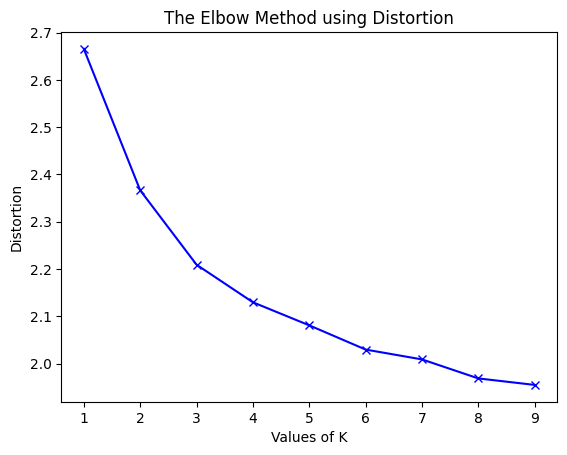

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

**To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 3.**